In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta=eta # 학습률 (0.0과 1.0 사이)
        self.n_iter=n_iter #훈련 데이터셋 반복 횟수
        self.random_state=random_state # 가중치 무작위 초기화 위한 난수 생성기 시드
    
    
        #w_ :1d-array => 학습된 가중치
        #errors_ : list => 에포크마다 누적된 분류 오류
        
    def fit(self,X,y):
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
        self.errors_=[]
        # X: {array_like},shape=[n_samples,n_features]
        # n_sample개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        
        #y:array_like, shape=[n_sample]  타깃 값
        for _ in range(self.n_iter): 
            errors=0
            for xi,target in zip(X,y): #X, y를 하나씩 xi,와 target에
                update=self.eta *(target - self.predict(xi))
                self.w_[1:] += update *xi
                self.w_[0] += update
                errors +=int(update !=0.0)
            self.errors_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)

In [3]:
v1=np.array([1,2,3])
v2=0.5*v1
np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

0.0

In [4]:
import pandas as pd
df=pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)

In [9]:
y=df.iloc[0:100,4].values

In [32]:
y=np.where(y=='Iris-setosa',-1,1)

In [51]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [16]:
X=df.iloc[0:100,[0,2]].values

In [17]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [39]:
X.shape[1]

2

In [40]:
X.shape[0]

100

In [19]:
rgen=np.random.RandomState(1)

In [43]:
w=rgen.normal(loc=0.0 , scale=0.01, size=1+X.shape[1])

In [44]:
w

array([-0.0024937 ,  0.01462108, -0.02060141])

In [45]:
w[1:]

array([ 0.01462108, -0.02060141])

In [46]:
w[0]

-0.0024937037547741008

In [48]:
w_=w[1:]+w[0]

In [50]:
w_

array([ 0.01212738, -0.02309511])

In [49]:
np.dot(X,w_)

array([ 0.02951646,  0.02709099,  0.02697502,  0.02114326,  0.02830372,
        0.02622614,  0.02345277,  0.02599421,  0.0210273 ,  0.02478147,
        0.03084516,  0.02125923,  0.02587825,  0.02674309,  0.04262465,
        0.03448337,  0.03546418,  0.02951646,  0.02986435,  0.02720695,
        0.02622614,  0.02720695,  0.03269082,  0.02258793,  0.01433069,
        0.0236847 ,  0.0236847 ,  0.02841969,  0.0307292 ,  0.02004649,
        0.02125923,  0.03084516,  0.02841969,  0.03436741,  0.02478147,
        0.03292275,  0.03667692,  0.02478147,  0.02333681,  0.02720695,
        0.03061323,  0.02454955,  0.02333681,  0.0236847 ,  0.01796891,
        0.02587825,  0.02489744,  0.02345277,  0.02963242,  0.02830372,
       -0.02365539, -0.02631279, -0.02948715, -0.02567988, -0.02740957,
       -0.03480196, -0.03214455, -0.01678973, -0.02619683, -0.02700858,
       -0.02019601, -0.02544795, -0.01961619, -0.03457003, -0.0152291 ,
       -0.02036507, -0.0360147 , -0.02435118, -0.02873827, -0.02

In [25]:
input=np.dot(X,w[1:]+w[0])

In [28]:
input

array([-0.05782871, -0.05741359, -0.05362396, -0.06016542, -0.05762115,
       -0.06857492, -0.05679091, -0.06099566, -0.05637579, -0.0607881 ,
       -0.0618259 , -0.06395504, -0.05720603, -0.0460447 , -0.05253263,
       -0.06244859, -0.05507689, -0.05782871, -0.0691976 , -0.06120322,
       -0.06857492, -0.06120322, -0.04329288, -0.06795224, -0.07407857,
       -0.06437017, -0.06437017, -0.06141078, -0.05803627, -0.06374748,
       -0.06395504, -0.0618259 , -0.06141078, -0.05865896, -0.0607881 ,
       -0.05087214, -0.05528445, -0.0607881 , -0.05300128, -0.06120322,
       -0.05424664, -0.05320884, -0.05300128, -0.06437017, -0.07470125,
       -0.05720603, -0.06457773, -0.05679091, -0.06161834, -0.05762115,
       -0.17313111, -0.16513673, -0.17967257, -0.14639615, -0.1687188 ,
       -0.16368381, -0.17167819, -0.12152923, -0.16892636, -0.14239896,
       -0.12848581, -0.15397541, -0.14743395, -0.17126306, -0.13310568,
       -0.16238491, -0.16347624, -0.15039334, -0.16472161, -0.14

In [29]:
predict=np.where(input>0.0,1,-1)

In [31]:
predict

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [35]:
update=0.01*(y-predict)

In [38]:
update

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
       0.02])

In [60]:
update !=0.0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


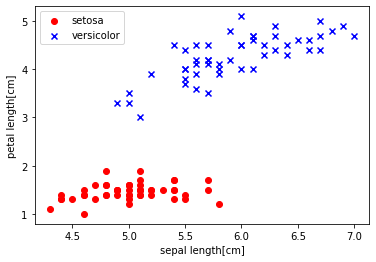

In [36]:
import matplotlib.pyplot as plt
import numpy as np


# setosa, versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)#y가 lris-setosa라면 -1 아니면 1


#꽃 받침 길이 ,꽃잎길이 추출
X=df.iloc[0:100,[0,2]].values

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')

plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()

In [34]:
# q=df.iloc[0:100,[0,2]].values

In [35]:
# q

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

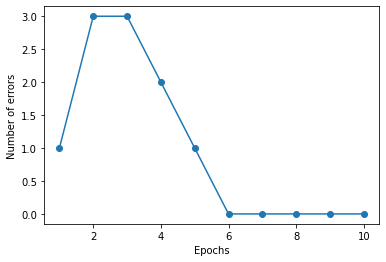

In [37]:
ppn=Perceptron(eta=0.1,n_iter=10)

ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')

plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [38]:
from matplotlib.colors import ListedColormap

In [29]:
def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))]) # unique=> 유일한 값
    
    x1_min,x1_max=X[:,0].min() -1, X[:,0].max()+1
    x2_min,x2_max=X[:,1].min() -1, X[:,0].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    #meshgird_Page
    #https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
    
    
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    # ravel 메서드는 입력된 배열을 1차원으로 펼친다.
    #그 다음 펼쳐진 두개의 배열을 행으로 붙여서 하나의 행렬을 만든다.
    # 마지막으로 행렬을 전치(.T속성)하여 두 개의 열이 되도록 바꾼다. 이두열을 xy평면의 좌표값
    
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    # contoruf함수로 동고선 그래프를 그린다.
    
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,edgecolor='black')

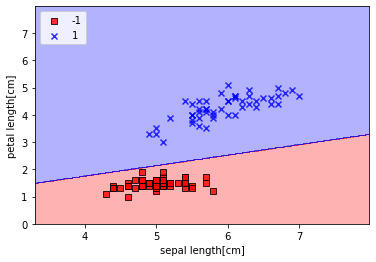

In [30]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()